# Visualize quarantines

Visualize the temporal distribution of the false positive (wrongly quarantined) and false negative (wrongly untraced).

### Imports and setup

In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from matplotlib.lines import Line2D

### Imports and setup

In [2]:
param = [(-73,1800,7),(-80,20*60,7),(-83,15*60,7),(-87,10*60,7),(-91 ,5*60,7)]
Y_i = 1
max_time_quar = 10

# Simulation file
data_set = "RESULTS/"

# File where to save the figure
figure_name = 'figure_quarantines'

### Utility functions

In [3]:
def plot_avg_std(data,days,alpha,color,color2,line):
    data_mean = np.mean(data,0)
    data_std = np.std(data,0)
    length = range(len(data_mean))
    diff_a = data_mean - data_std
    diff_a = [max(0,x) for x in diff_a]
    plt.fill_between(days,data_mean+data_std,data_mean,color=color2,alpha=alpha)
    plt.fill_between(days,diff_a,data_mean,color=color2,alpha=alpha)
    plt.plot(days,data_mean,line,color=color,label="infec")
    
def load_file_socio(fileName):
    with open(fileName, 'r') as csvfile:
        reader = csv.reader(csvfile,delimiter=",")
        res_lists = []
        for i in reader:
            for j in i:
                res_lists.append(j)

    new_res_lists = []
    for i in res_lists:
        tmp = []
        for j in i[1:-1].split(','):
            tmp.append(float(j))
        new_res_lists.append(tmp)
    return(new_res_lists)


def load_file_DTU(fileName):
    with open(fileName, 'r') as csvfile:
        reader = csv.reader(csvfile)
        res_lists = [[e for e in r] for r in reader]
        new_res_lists = []
        for res_l in res_lists:
            tmp = []
            for r in res_l:
                tmp.append(float(r))
            new_res_lists.append(tmp)
    return(new_res_lists)

### Load the data and process the results

In [4]:
act_infs = []
quar_is_s = []
for eps_I in [0.8]:
    for filter_rssi,filter_duration,memory_contacts in param:
        # active infected
        fileName = data_set+'actInfs_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        act_infs.append(load_file_DTU(fileName))
        #fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        #quar = load_file_DTU(fileName)
        fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        quar_is_s.append(load_file_DTU(fileName))
        
        colors = ["#2CA02C","#FFD700","#FF7F0E","#FF0000","#A52A2A"]
days = np.arange(0,(len(act_infs[0][0])*300)/(24*3600)-(300/(3600*24)),300/(3600*24))
plt.rcParams.update({'font.size': 12})

### Plot

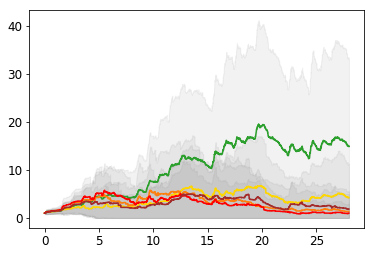

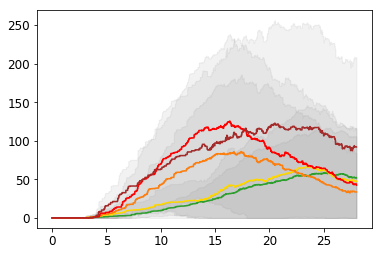

In [5]:
alpha = 0.1
for i in range(len(act_infs)):
    plot_avg_std(act_infs[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(figure_name+"FN.pdf", bbox_inches = 'tight')
plt.show()

for i in range(len(quar_is_s)):
    plot_avg_std(quar_is_s[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(figure_name+"FP.pdf", bbox_inches = 'tight')
plt.show()